<Figure size 1300x700 with 0 Axes>

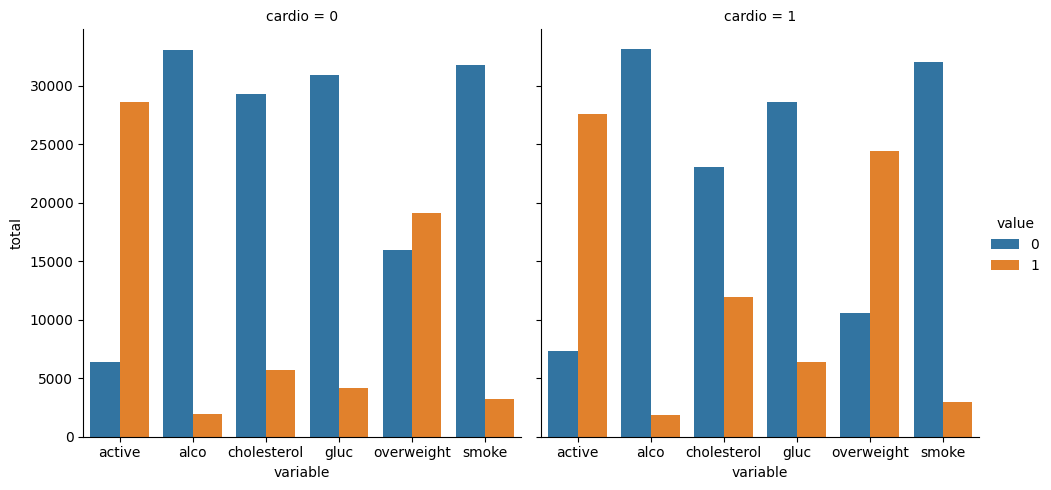

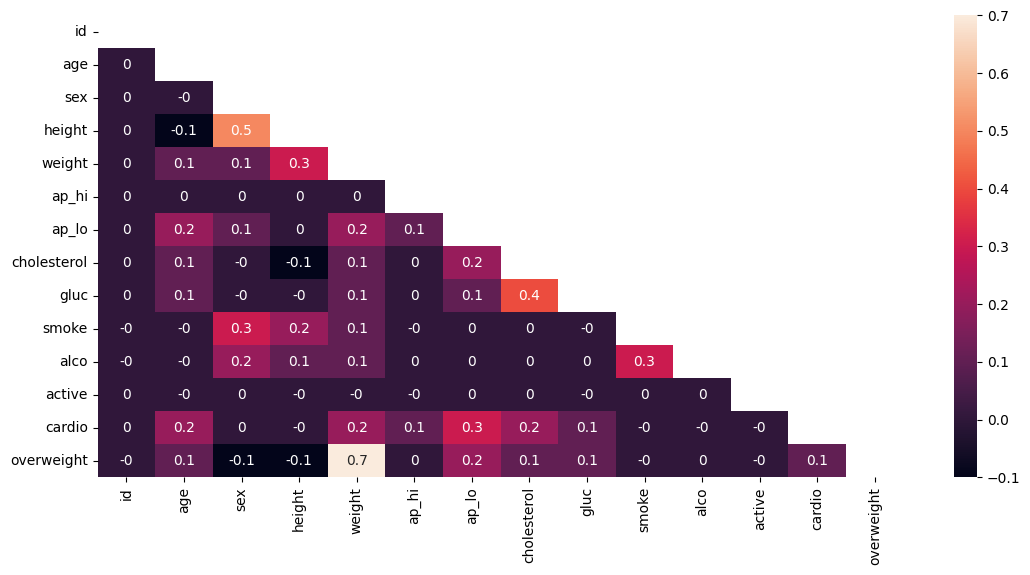

In [ ]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Reading CSV File
df=pd.read_csv('medical_examination.csv')

#Converting height into metres
df['height']=df['height']/100

#Creating overweight column
df['overweight']=df['weight']/(df['height']**2)

#Normalise overweight data
df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)

#Normalise cholesterol data
df['cholesterol'] = df['cholesterol'].apply(lambda y: 1 if y > 1 else 0)

#Normalise Gluc data
df['gluc']=df['gluc'].apply(lambda z: 1 if z > 1 else 0)

#Converting data into long format
cardio_value = pd.melt(df, id_vars=['cardio'], value_vars=['active',  'alco', 'cholesterol','gluc','overweight', 'smoke'])

#Plotting chart
plt.figure(figsize=(13, 7))
chart = sns.catplot(data=cardio_value, kind='count', x='variable', hue='value', col='cardio')
chart.set_ylabels('total')

plt.show()

# Cleaning data as per requirement

df = df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

# Creating correlation matrix
correlation_matrix = df.corr().round(1)

# Plotting Heatmap for correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(13, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True)
plt.show()